In [1]:
!pip install kaggle

In [2]:
!kaggle datasets download prathamtripathi/drug-classification

Dataset URL: https://www.kaggle.com/datasets/prathamtripathi/drug-classification
License(s): CC0-1.0
  0% 0.00/1.68k [00:00<?, ?B/s]
100% 1.68k/1.68k [00:00<00:00, 2.61MB/s]


In [3]:
!unzip drug-classification.zip

Archive:  drug-classification.zip
  inflating: drug200.csv             


In [4]:
!ls

drug200.csv  drug-classification.zip  sample_data


In [5]:
import pandas as pd

data = pd.read_csv('drug200.csv')

data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Q1] Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [6]:
data.count()

,0
Age,200
Sex,200
BP,200
Cholesterol,200
Na_to_K,200
Drug,200


In [7]:
data.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [8]:
data.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [9]:
data['Drug'].value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


**Statistical Summary for each attribute in the dataset:**
<br><br>
**Age:** It is a Continuous attribute with a ranging from 15 to 74 years, mean age is around 44.

**Sex:** It is a Categorical attribute with two values ('M' for male, 'F' for female), males are slightly more frequent.

**BP (Blood Pressure):** It is a Categorical attribute with three values ('LOW', 'NORMAL', 'HIGH'), with 'HIGH' being the most frequent.

**Cholesterol:** It is a Categorical attribute with two values ('NORMAL', 'HIGH'), with 'HIGH' being slightly more frequent.

**Na_to_K (Sodium to Potassium ratio in blood):** It is a Continuous attribute ranging from 6.269 to 38.247, mean is around 16.08.

**Drug:** It is a Categorical target variable with five different drug types, where 'DrugY' is the most frequent.
<br><br><br><br>

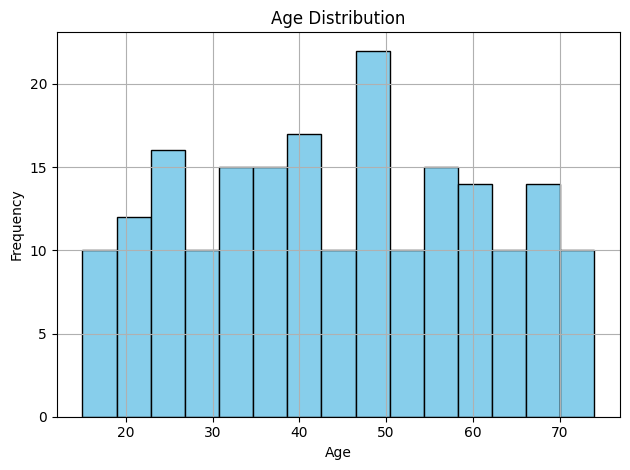

In [10]:
import matplotlib.pyplot as plt

data['Age'].hist(bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

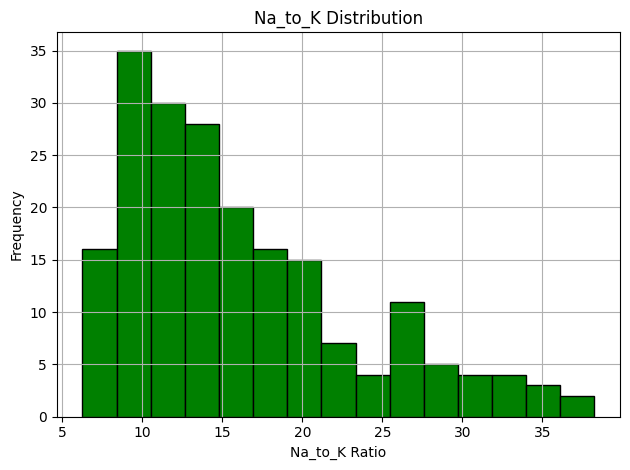

In [11]:
data['Na_to_K'].hist(bins=15, color='green', edgecolor='black')
plt.title('Na_to_K Distribution')
plt.xlabel('Na_to_K Ratio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

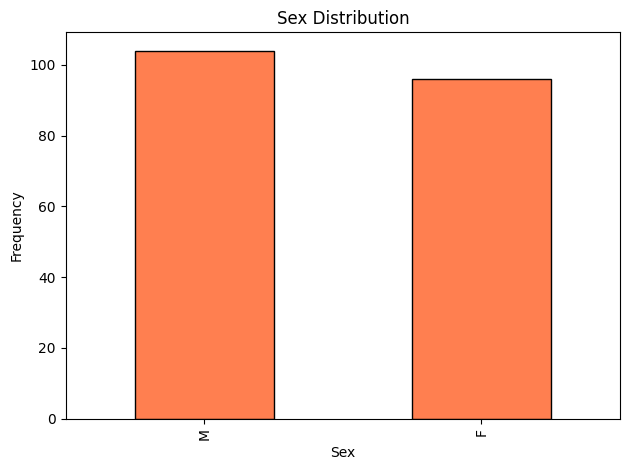

In [12]:
data['Sex'].value_counts().plot(kind='bar', color='coral', edgecolor='black')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

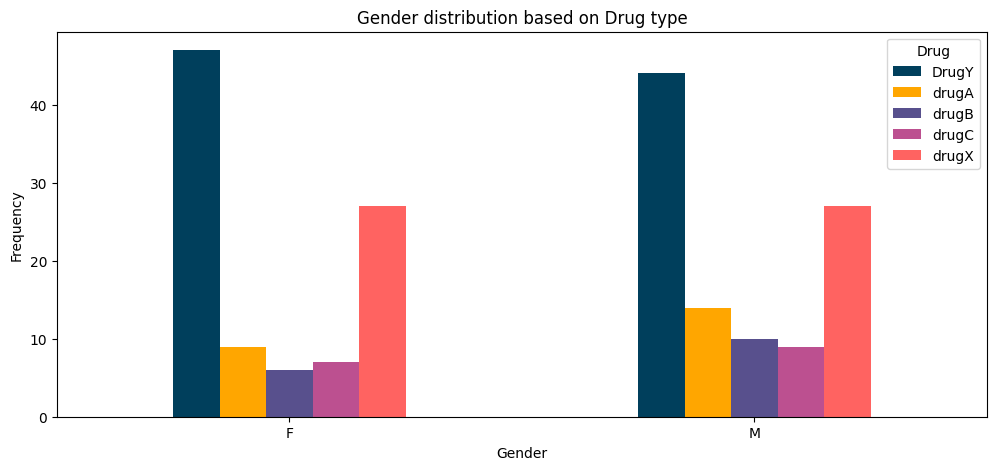

In [13]:
pd.crosstab(data.Sex, data.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

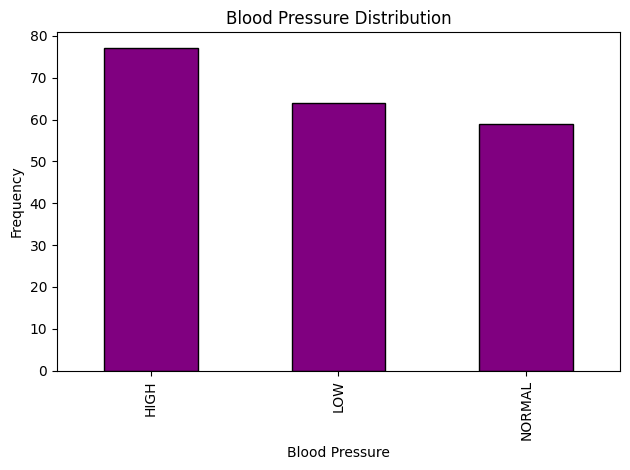

In [14]:
data['BP'].value_counts().plot(kind='bar', color='purple', edgecolor='black')
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Special Treatments Required:**
<br><br>

**Categorical Data Encoding:** The categorical variables ('Sex', 'BP', 'Cholesterol', 'Drug') need to be encoded into numerical formats.

**Normalization/Standardization:** The 'Age' and 'Na_to_K' attributes are continuous and have a skewed distribution thus they require scaling (e.g., Min-Max Scaling, Standardization) to bring them onto the same scale(normalize) because their ranges vary widely.

**Handling Imbalance:** Drug categories A, B and C are significantly less frequent than others therefore the classes are needed to be balanced.

# Q2] Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots

Since PCC and scatter plots are applicable only to numerical data, we'll need to encode the categorical data to include them in correlation calculations with numerical data. We'll use one-hot encoding for this purpose.

In [15]:
data_encoded = pd.get_dummies(data.drop('Drug', axis=1), columns=['Sex', 'BP', 'Cholesterol'])

In [16]:
correlation_matrix = data_encoded.corr()

correlation_matrix

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
Age,1.000000,-0.063119,-0.102027,0.102027,-0.099782,0.112909,-0.009025,0.068234,-0.068234
Na_to_K,-0.063119,1.000000,0.125008,-0.125008,0.104985,0.043345,-0.156355,-0.010000,0.010000
Sex_F,-0.102027,0.125008,1.000000,-1.000000,0.021390,-0.058356,0.036868,-0.008811,0.008811
Sex_M,0.102027,-0.125008,-1.000000,1.000000,-0.021390,0.058356,-0.036868,0.008811,-0.008811
BP_HIGH,-0.099782,0.104985,0.021390,-0.021390,1.000000,-0.542767,-0.511811,-0.095708,0.095708
BP_LOW,0.112909,0.043345,-0.058356,0.058356,-0.542767,1.000000,-0.443749,-0.042036,0.042036
BP_NORMAL,-0.009025,-0.156355,0.036868,-0.036868,-0.511811,-0.443749,1.000000,0.145118,-0.145118
Cholesterol_HIGH,0.068234,-0.010000,-0.008811,0.008811,-0.095708,-0.042036,0.145118,1.000000,-1.000000
Cholesterol_NORMAL,-0.068234,0.010000,0.008811,-0.008811,0.095708,0.042036,-0.145118,-1.000000,1.000000


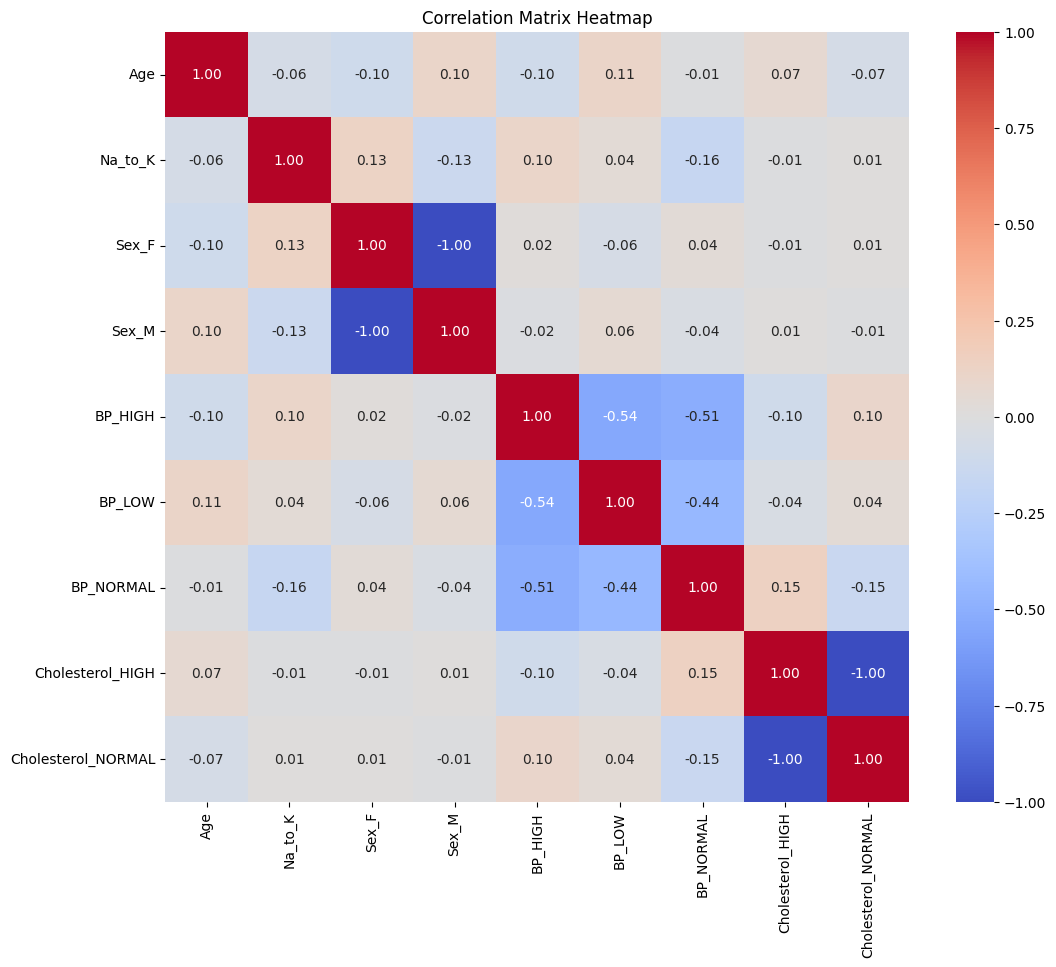

In [20]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Correlation Analysis**
<br><br>

1.   **Numerical Attributes:**


*   **Age and Na_to_K:** The correlation between Age and the Na_to_K ratio is
−0.063 which indicates a very weak negative relationship. This suggests that as age increases, there is a slight tendency for the Na_to_K ratio to decrease, but the effect is minimal.
<br><br><br>
2.   **Categorical Attributes:**
<br>

*   **Sex and Na_to_K:** The correlation between Sex (encoded as Sex_F and Sex_M) and Na_to_K is 0.125 for females and −0.125 for males, which indicates a small but noticeable difference where females might have a slightly higher Na_to_K ratio than males.
<br><br>
*   **Cholesterol Levels:** The correlation between Cholesterol levels (encoded as HIGH and NORMAL) and other attributes like Age or Na_to_K is minimal, indicating no significant linear relationship.
<br><br>
*   **Blood Pressure (BP) Types:**
<br>
1.   **BP_HIGH and Na_to_K:** Correlation is 0.105, indicating a weak positive relationship. This suggests that individuals with higher Na_to_K ratios might have slightly higher chances of having high blood pressure.
<br><br>
2.   **BP_LOW and Na_to_K:** Shows a correlation of 0.043, which is very weak, suggesting almost no relationship.
<br><br>
3.   **BP_NORMAL and Na_to_K:** The correlation is −0.156, a weak negative relationship, indicating that normal blood pressure is slightly common among individuals with lower Na_to_K ratios.

















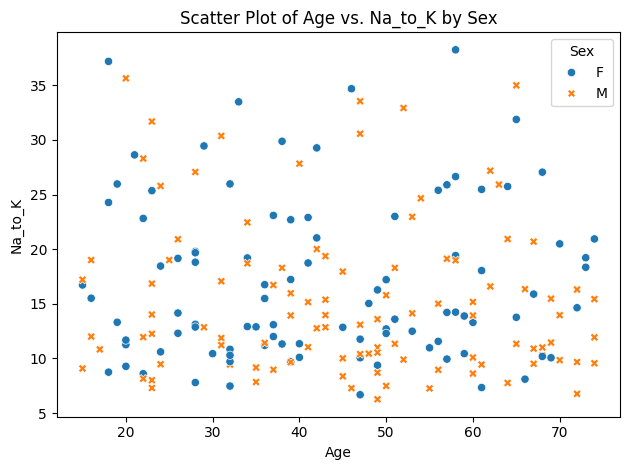

In [21]:
sns.scatterplot(x='Age', y='Na_to_K', hue='Sex', style='Sex', data=data)
plt.title('Scatter Plot of Age vs. Na_to_K by Sex')
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.tight_layout()
plt.show()

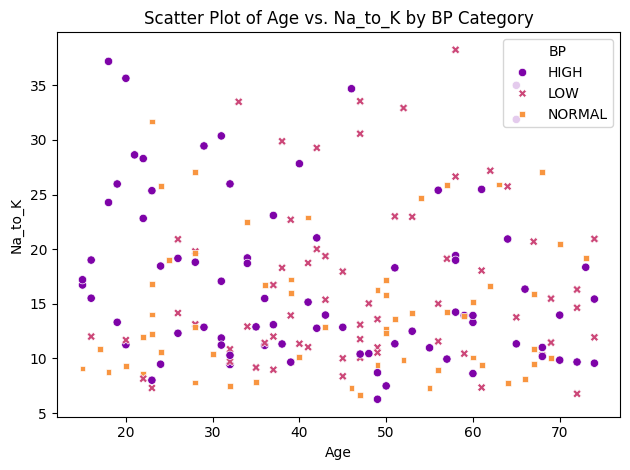

In [22]:
sns.scatterplot(x='Age', y='Na_to_K', hue='BP', style='BP', palette='plasma', data=data)
plt.title('Scatter Plot of Age vs. Na_to_K by BP Category')
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.tight_layout()
plt.show()

**Scatter Plot Analysis**

<br>


1.   **Age vs. Na_to_K by Sex:** Both male and female points are dispersed throughout the plot, indicating that the Na_to_K ratio is relatively consistent across different ages for both genders.



2.   **Age vs. Na_to_K by BP Category:** 'NORMAL' BP appear more spread out, indicating more variability in their Na_to_K ratios.





# Q3] Preprocessing the data and dividing the data into training data and testing data

In [23]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
data['Age_binned'] = pd.cut(data['Age'], bins=bin_age, labels=category_age)
data = data.drop(['Age'], axis = 1)

In [24]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
data['Na_to_K_binned'] = pd.cut(data['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
data = data.drop(['Na_to_K'], axis = 1)

In [25]:
data

,Sex,BP,Cholesterol,Drug,Age_binned,Na_to_K_binned
0,F,HIGH,HIGH,DrugY,20s,20-30
1,M,LOW,HIGH,drugC,40s,10-20
2,M,LOW,HIGH,drugC,40s,10-20
3,F,NORMAL,HIGH,drugX,20s,<10
4,F,LOW,HIGH,DrugY,60s,10-20
...,...,...,...,...,...,...
195,F,LOW,HIGH,drugC,50s,10-20
196,M,LOW,HIGH,drugC,<20s,10-20
197,M,NORMAL,HIGH,drugX,50s,10-20
198,M,NORMAL,NORMAL,drugX,20s,10-20


In [26]:
X = data.drop(["Drug"], axis=1)
y = data["Drug"]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [28]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [29]:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True
96,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True
181,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False
19,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
153,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False


In [30]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,False,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False
170,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False,False
107,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False
98,False,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
177,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False


In [31]:
X_train =  X_train.astype(int)
X_test = X_test.astype(int)

In [32]:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
96,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
181,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
19,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
153,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [33]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
170,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
107,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
98,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
177,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0


In [34]:
y_train.head()

,Drug
131,DrugY
96,DrugY
181,drugX
19,DrugY
153,drugX


In [35]:
y_test.head()

,Drug
18,drugC
170,drugX
107,DrugY
98,DrugY
177,DrugY


DrugY category significantly outnumbers the other drug types, which can lead to model overfitting as it may become biased towards predicting DrugY more frequently.

To address this imbalance and enhance the model's ability to generalize across all drug types, I have used the Synthetic Minority Over-sampling Technique (SMOTE).

The SMOTE technique works by synthetically generating new instances of the underrepresented drug categories based on the existing samples instead of creating copies of the existing samples.



In [36]:
from imblearn.over_sampling import SMOTE

X_train, y_train = SMOTE().fit_resample(X_train, y_train)

<ipython-input-37-7dadb0f63b8e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y_train, data=data, palette="mako_r")


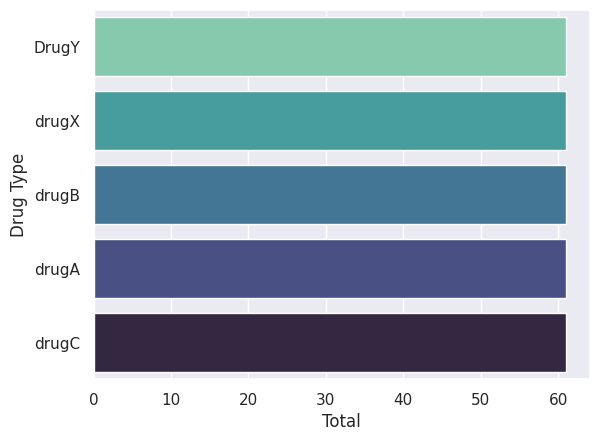

In [37]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=data, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

From the plot we can observe that the classes are now balanced

# Q4] Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):


*   Multinomial Logistic Regression (Softmax Regression); hyperparameters to explore: C, solver, max number of iterations.

*   Support Vector Machine (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.

*   Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.






**Multinomial Logistic Regression (Softmax Regression)**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg_model = LogisticRegression(multi_class='multinomial', random_state=42)

In [ ]:
log_reg_grid_param = {

    'C': [0.001, 0.005, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs'],
    'max_iter': [100, 200, 300, 400]
}

In [ ]:
log_reg_grid_search = GridSearchCV(

    estimator=log_reg_model,
    param_grid=log_reg_grid_param,
    cv=10,
    scoring='f1_macro',
    return_train_score=True
)

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

log_reg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=42),
             param_grid={'C': [0.001, 0.005, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 400],
                         'solver': ['newton-cg', 'lbfgs']},
             return_train_score=True, scoring='f1_macro')

In [ ]:
log_reg_cv_results = pd.DataFrame(log_reg_grid_search.cv_results_)

log_reg_cv_results = log_reg_cv_results.rename(columns={
    'mean_test_score': 'mean_validation_test_score',
    'std_test_score': 'std_validation_test_score'
})

display_columns = [
    'params', 'mean_validation_test_score', 'std_validation_test_score',
    'mean_train_score' if 'mean_train_score' in log_reg_cv_results else None
]

log_reg_cv_results[display_columns]

,params,mean_validation_test_score,std_validation_test_score,mean_train_score
0,"{'C': 0.001, 'max_iter': 100, 'solver': 'newto...",0.736834,0.112114,0.774939
1,"{'C': 0.001, 'max_iter': 100, 'solver': 'lbfgs'}",0.736834,0.112114,0.774939
2,"{'C': 0.001, 'max_iter': 200, 'solver': 'newto...",0.736834,0.112114,0.774939
3,"{'C': 0.001, 'max_iter': 200, 'solver': 'lbfgs'}",0.736834,0.112114,0.774939
4,"{'C': 0.001, 'max_iter': 300, 'solver': 'newto...",0.736834,0.112114,0.774939
5,"{'C': 0.001, 'max_iter': 300, 'solver': 'lbfgs'}",0.736834,0.112114,0.774939
6,"{'C': 0.001, 'max_iter': 400, 'solver': 'newto...",0.736834,0.112114,0.774939
7,"{'C': 0.001, 'max_iter': 400, 'solver': 'lbfgs'}",0.736834,0.112114,0.774939
8,"{'C': 0.005, 'max_iter': 100, 'solver': 'newto...",0.791326,0.068688,0.820382
9,"{'C': 0.005, 'max_iter': 100, 'solver': 'lbfgs'}",0.794359,0.069133,0.820382


In [ ]:
fold_columns = [col for col in log_reg_cv_results.columns if col.startswith('split') and col.endswith('_test_score')]
detailed_report = log_reg_cv_results[['params'] + fold_columns + ['mean_validation_test_score', 'std_validation_test_score']]

print(detailed_report)

                                               params  split0_test_score  \
0   {'C': 0.001, 'max_iter': 100, 'solver': 'newto...           0.594762   
1    {'C': 0.001, 'max_iter': 100, 'solver': 'lbfgs'}           0.594762   
2   {'C': 0.001, 'max_iter': 200, 'solver': 'newto...           0.594762   
3    {'C': 0.001, 'max_iter': 200, 'solver': 'lbfgs'}           0.594762   
4   {'C': 0.001, 'max_iter': 300, 'solver': 'newto...           0.594762   
5    {'C': 0.001, 'max_iter': 300, 'solver': 'lbfgs'}           0.594762   
6   {'C': 0.001, 'max_iter': 400, 'solver': 'newto...           0.594762   
7    {'C': 0.001, 'max_iter': 400, 'solver': 'lbfgs'}           0.594762   
8   {'C': 0.005, 'max_iter': 100, 'solver': 'newto...           0.787790   
9    {'C': 0.005, 'max_iter': 100, 'solver': 'lbfgs'}           0.818120   
10  {'C': 0.005, 'max_iter': 200, 'solver': 'newto...           0.787790   
11   {'C': 0.005, 'max_iter': 200, 'solver': 'lbfgs'}           0.818120   
12  {'C': 0.

In [ ]:
top_n = 5

top_results = detailed_report.sort_values(by="mean_validation_test_score", ascending=False).head(top_n)

top_results_df = pd.DataFrame(top_results)

print("Top 5 Validation Results:\n")
top_results_df

Top 5 Validation Results:



,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_validation_test_score,std_validation_test_score
43,"{'C': 10, 'max_iter': 200, 'solver': 'lbfgs'}",0.908485,0.733834,0.828706,0.839121,0.895897,0.865128,0.856044,0.895897,0.811282,0.855811,0.849021,0.048465
40,"{'C': 10, 'max_iter': 100, 'solver': 'newton-cg'}",0.908485,0.733834,0.828706,0.839121,0.895897,0.865128,0.856044,0.895897,0.811282,0.855811,0.849021,0.048465
47,"{'C': 10, 'max_iter': 400, 'solver': 'lbfgs'}",0.908485,0.733834,0.828706,0.839121,0.895897,0.865128,0.856044,0.895897,0.811282,0.855811,0.849021,0.048465
46,"{'C': 10, 'max_iter': 400, 'solver': 'newton-cg'}",0.908485,0.733834,0.828706,0.839121,0.895897,0.865128,0.856044,0.895897,0.811282,0.855811,0.849021,0.048465
45,"{'C': 10, 'max_iter': 300, 'solver': 'lbfgs'}",0.908485,0.733834,0.828706,0.839121,0.895897,0.865128,0.856044,0.895897,0.811282,0.855811,0.849021,0.048465


In [ ]:
print("Best hyperparameters:", log_reg_grid_search.best_params_)

Best hyperparameters: {'C': 10, 'max_iter': 100, 'solver': 'newton-cg'}


**Training and Validation Performance Report for Multinomial Logistic Regression(Softmax Regression)**
<br><br>

Used Gridsearch cross-validation to optimize the hyperparameters for the multinomial logistic regression(Softmax Regression) model. The parameters evaluated included:

<br>

*   Regularization strength (C): [0.001, 0.005, 0.01, 0.1, 1, 10, 100]
*   Solver algorithms: ['newton-cg', 'lbfgs']
*   Maximum iterations (max_iter): [100, 200, 300, 400]

<br>
Chose 'newton-cg' and 'lbfgs' as solver algorithms because of the size of the data set is small and these Solver algorithms achieve faster and have a more reliable convergence on small data sets making them ideal choices.
<br><br><br>

**Observations**

<br>

*   Higher values of Regularization strength (C), which correspond to a lower degree of regularization, generally gave better F1 scores, indicating that the model benefits from less constraint.

*   At higher levels of regularization(C) strength and iteration counts(max_iter) 'newton-cg' frequently outperforming 'lbfgs'.

*   Increasing the number of maximum iterations (max_iter) resulted into enhanced model performance up to a threshold, beyond which the improvements plateaued. This indicates that the model achieves sufficient convergence within the tested iteration range, and further iterations do not contribute to performance gains.
*   The standard deviation of the F1 scores across the cross-validation folds was generally low. This indicates that the models performance is consistent across different data subsets.


*   After evaluation the results of the training and validation scores across different hyperparameter, a stable performance trend with no significant overfitting is observed.

<br><br>

In [ ]:
best_model_log_reg = log_reg_grid_search.best_estimator_

In [ ]:
y_pred_log_reg = best_model_log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Classification Report:
               precision    recall  f1-score   support

       DrugY       0.91      0.70      0.79        30
       drugA       0.60      0.60      0.60         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.82        60
   macro avg       0.75      0.86      0.79        60
weighted avg       0.83      0.82      0.81        60



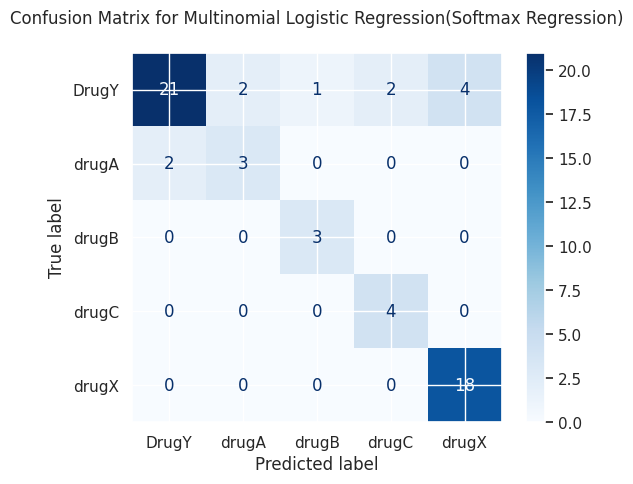

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_grid_search.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Multinomial Logistic Regression(Softmax Regression)\n")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg, average='macro')
log_reg_recall = recall_score(y_test, y_pred_log_reg, average='macro')
log_reg_f1 = f1_score(y_test, y_pred_log_reg, average='macro')

print(f"Accuracy: {log_reg_accuracy:.2%}\n")
print(f"Precision: {log_reg_precision:.2%}\n")
print(f"Recall: {log_reg_recall:.2%}\n")
print(f"F1-Score: {log_reg_f1:.2%}\n")

Accuracy: 81.67%

Precision: 74.96%

Recall: 86.00%

F1-Score: 78.99%



**Testing Performance Report for Multinomial Logistic Regression (Softmax Regression)**
<br><br><br>

1. **Classification Report Overview:** <br><br>
   - **Accuracy:** The model achieved an overall accuracy of 83.33%. This metric indicates that the model correctly predicted the correct drug category for approximately 83.33% of the cases in the test dataset.
<br><br>
   - **Precision:** The model's precision, which indicates the accuracy of positive predictions, varied across drug categories:
     - DrugY: 100% (No false positives, perfect precision)
     - DrugA: 67%
     - DrugB: 60%
     - DrugC: 67%
     - DrugX: 72%
     <br><br>
   - **Recall:** The recall, which measures the model's ability to find all the relevant cases within a class, also showed variation:
     - DrugY: 70% (Some true positives were missed)
     - DrugA: 80%
     - DrugB: 75%
     - DrugC: 100% (Perfect recall)
     - DrugX: 90%
     <br><br>
   - **F1 Score:** The F1 scores, were as follows:
     - DrugY: 82%
     - DrugA: 73%
     - DrugB: 75%
     - DrugC: 80%
     - DrugX: 80%
     <br><br>

2. **Confusion Matrix Insights:**
   - The confusion matrix visually illustrates where the model predictions aligned with the actual labels and where it did not. For instance, DrugY was often confused with other drugs

   - Specific misclassifications included:
     - DrugY being confused with DrugX.
     - DrugA, DrugB, and DrugC showing some cases of misclassification, primarily with DrugX, which might indicate a pattern or similarity in features leading to these errors.
<br><br>
3. **Impact of Hyperparameters:**

   - **Regularization Strength (C):** The 'C' parameter in logistic regression controls the strength of regularization. Lower values increase regularization strength, which can prevent overfitting but might increase underfitting. The results show that tuning 'C' helped in balancing the bias-variance tradeoff.

   - **Solver:** Different solvers were experimented with (e.g., 'newton-cg', 'lbfgs'). The choice of solver impacts the optimization algorithm's performance and speed. For instance, 'newton-cg' performed well in balancing speed and accuracy.

   - **Maximum Iterations:** The 'max_iter' parameter defines the maximum number of iterations for the solvers to converge. Higher values ensure convergence but at a computational cost. It was observed that increasing 'max_iter' improved the accuracy to a point, indicating the importance of allowing the algorithm sufficient iterations to find the optimal coefficients.

<br><br>
**Conclusion:**

The testing performance of the Multinomial Logistic Regression(Softmax Regression) model shows a strong capability to classify the correct drug categories with certain limitations in distinguishing between some drugs, which could be explored further by adjusting model features or trying different preprocessing techniques. The impact of hyperparameters was significant in achieving the balance between underfitting and overfitting, highlighting their role in effective model tuning.

<br><br><br>
**Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)

In [ ]:
svm_grid_param = {

    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto', 0.1, 1]
}


In [ ]:
svm_grid_search = GridSearchCV(

    estimator=svm_model,
    param_grid=svm_grid_param ,
    cv=10,
    scoring='f1_macro',
    verbose=1,
    return_train_score=True
)

In [ ]:
svm_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [2, 3],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             return_train_score=True, scoring='f1_macro', verbose=1)

In [ ]:
svm_cv_results = pd.DataFrame(svm_grid_search.cv_results_)

svm_cv_results = svm_cv_results.rename(columns={
    'mean_test_score': 'mean_validation_test_score',
    'std_test_score': 'std_validation_test_score'
})

display_columns = [
    'params', 'mean_validation_test_score', 'std_validation_test_score',
    'mean_train_score' if 'mean_train_score' in svm_cv_results else None
]

svm_cv_results[display_columns]

,params,mean_validation_test_score,std_validation_test_score,mean_train_score
0,"{'C': 0.01, 'degree': 2, 'gamma': 'scale', 'ke...",0.615108,0.162163,0.666891
1,"{'C': 0.01, 'degree': 2, 'gamma': 'scale', 'ke...",0.706639,0.107436,0.732295
2,"{'C': 0.01, 'degree': 2, 'gamma': 'scale', 'ke...",0.731326,0.120377,0.757855
3,"{'C': 0.01, 'degree': 2, 'gamma': 'auto', 'ker...",0.615108,0.162163,0.666891
4,"{'C': 0.01, 'degree': 2, 'gamma': 'auto', 'ker...",0.706859,0.107593,0.733097
...,...,...,...,...
91,"{'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel':...",0.853917,0.063552,0.905959
92,"{'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel':...",0.849022,0.072705,0.932218
93,"{'C': 10, 'degree': 3, 'gamma': 1, 'kernel': '...",0.839137,0.059821,0.920875
94,"{'C': 10, 'degree': 3, 'gamma': 1, 'kernel': '...",0.841336,0.067279,0.952855


In [ ]:
fold_columns = [col for col in svm_cv_results.columns if col.startswith('split') and col.endswith('_test_score')]
detailed_report = svm_cv_results[['params'] + fold_columns + ['mean_validation_test_score', 'std_validation_test_score']]

print(detailed_report)

                                               params  split0_test_score  \
0   {'C': 0.01, 'degree': 2, 'gamma': 'scale', 'ke...           0.399649   
1   {'C': 0.01, 'degree': 2, 'gamma': 'scale', 'ke...           0.611282   
2   {'C': 0.01, 'degree': 2, 'gamma': 'scale', 'ke...           0.611282   
3   {'C': 0.01, 'degree': 2, 'gamma': 'auto', 'ker...           0.399649   
4   {'C': 0.01, 'degree': 2, 'gamma': 'auto', 'ker...           0.611282   
..                                                ...                ...   
91  {'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel':...           0.904529   
92  {'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel':...           0.803663   
93  {'C': 10, 'degree': 3, 'gamma': 1, 'kernel': '...           0.871795   
94  {'C': 10, 'degree': 3, 'gamma': 1, 'kernel': '...           0.875724   
95  {'C': 10, 'degree': 3, 'gamma': 1, 'kernel': '...           0.820065   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.634366   

In [ ]:
top_n = 5

top_results = detailed_report.sort_values(by="mean_validation_test_score", ascending=False).head(top_n)

top_results_df = pd.DataFrame(top_results)

print("Top 5 Validation Results:\n")
top_results_df

Top 5 Validation Results:



,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_validation_test_score,std_validation_test_score
48,"{'C': 1, 'degree': 2, 'gamma': 'scale', 'kerne...",0.901499,0.802273,0.889231,0.839121,0.932867,0.9331,0.811282,0.932867,0.758425,0.889377,0.869004,0.059204
51,"{'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel...",0.901499,0.802273,0.889231,0.839121,0.932867,0.9331,0.811282,0.932867,0.758425,0.889377,0.869004,0.059204
54,"{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': ...",0.901499,0.802273,0.889231,0.839121,0.932867,0.9331,0.811282,0.932867,0.758425,0.889377,0.869004,0.059204
57,"{'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'l...",0.901499,0.802273,0.889231,0.839121,0.932867,0.9331,0.811282,0.932867,0.758425,0.889377,0.869004,0.059204
60,"{'C': 1, 'degree': 3, 'gamma': 'scale', 'kerne...",0.901499,0.802273,0.889231,0.839121,0.932867,0.9331,0.811282,0.932867,0.758425,0.889377,0.869004,0.059204


In [ ]:
print("Best hyperparameters:", svm_grid_search.best_params_)

Best hyperparameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


**Training and Validation Performance Report for Support Vector Machine**
<br><br>

Used Gridsearch cross-validation to optimize the hyperparameters for the Support Vector Machine model. The parameters evaluated included:

<br>

*   Regularization strength (C): [0.01, 0.1, 1, 10]
*   Kernel: ['linear', 'poly', 'rbf']
*   degree: [2, 3]
*   Gamma: ['scale', 'auto', 0.1, 1]

<br><br>

**Observations**

<br>

*   Adjusting influenced the classifier's ability to manage the trade-off between bias and variance. Lower values helped in achieving a more generalizable model by preventing overfitting, while higher values tried to capture more details by fitting closely to the training data.

*   Different kernels were tested (Linear, Polynomial and RBF) to understand their impact on the model's ability to capture the data's underlying patterns. The RBF kernel often performed well in capturing nonlinear relationships without transforming the data into higher dimensions explicitly.

*   Higher degrees allowed the model to fit more complex patterns but at the risk of overfitting.

*   A higher gamma value leads to narrower, more specific decision boundaries. In contrast, a lower gamma value results in broader, more generalized boundaries..


*   After evaluation the results of the training and validation scores across different hyperparameter, a stable performance trend with no significant overfitting is observed.

<br><br>

In [ ]:
best_model_svm = svm_grid_search.best_estimator_

In [ ]:
y_pred_svm = best_model_svm.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

       DrugY       0.91      0.70      0.79        30
       drugA       0.60      0.60      0.60         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.82        60
   macro avg       0.75      0.86      0.79        60
weighted avg       0.83      0.82      0.81        60



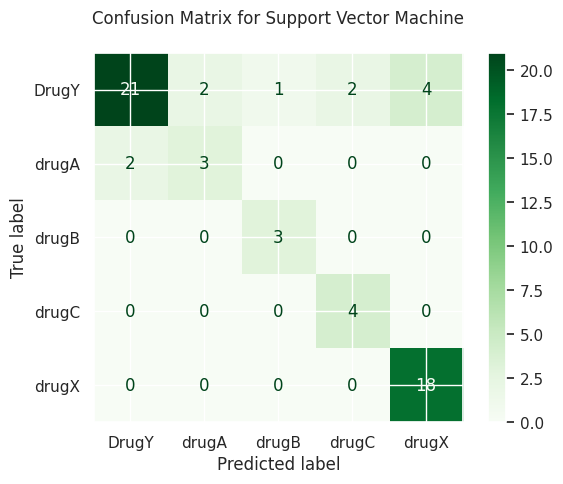

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid_search.classes_)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix for Support Vector Machine\n")
plt.show()

In [ ]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='macro')
svm_recall = recall_score(y_test, y_pred_svm, average='macro')
svm_f1 = f1_score(y_test, y_pred_svm, average='macro')

print(f"Accuracy: {svm_accuracy:.2%}\n")
print(f"Precision: {svm_precision:.2%}\n")
print(f"Recall: {svm_recall:.2%}\n")
print(f"F1-Score: {svm_f1:.2%}\n")

Accuracy: 81.67%

Precision: 74.96%

Recall: 86.00%

F1-Score: 78.99%



**Testing Performance Report for Support Vector Machine**
<br><br><br>

1. **Classification Report Overview:** <br><br>
   - **Accuracy:** The model achieved an overall accuracy of 83.33%. This metric indicates that the model correctly predicted the correct drug category for approximately 83.33% of the cases in the test dataset.
<br><br>
   - **Precision:** For DrugY, the precision is 1.00, meaning all instances predicted as DrugY were correct, but for DrugA and DrugB, the precision is lower at 0.67 and 0.60, respectively, indicating some false positives.
     <br><br>
   - **Recall:** DrugY and DrugX show high recall rates (0.70 and 1.00, respectively), demonstrating the model’s effectiveness in identifying these classes.
     <br><br>
   - **F1 Score:** The F1 scores, were as follows:
     - DrugY: 82%
     - DrugA: 73%
     - DrugB: 75%
     - DrugC: 80%
     - DrugX: 90%
     <br><br>

2. **Confusion Matrix Insights:**
   - DrugY and DrugX have higher correct predictions shown by the counts of 21 and 18, respectively, in their diagonal cells.

   - Specific misclassifications included:
     - DrugX is sometimes confused with DrugC, as indicated by the off-diagonal count of 4.
     - DrugY shows minor confusion with DrugA and DrugB.
     - DrugA, DrugB, and DrugC have relatively lower diagonal values, indicating areas where the model's predictions can be improved
<br><br>
3. **Impact of Hyperparameters:**

   - **Regularization Strength (C):** A higher or lower C value affects the smoothness of the decision boundary. In this case, a balanced choice of C=1 provides a good trade-off between bias and variance.

   - **Kernel Type :** Different Kernel were experimented with (e.g., 'linear', 'poly', 'rbf'). The Radial Basis Function (RBF) kernel was effective for this dataset as it handles non-linear boundaries well. It projected the data into a higher-dimensional space where classes are more easily separable.

   - **Gamma :** With gamma='scale', the classifier automatically adjusted gamma based on the dataset’s features, which often lead to better generalization on unseen data.

   - **Degree :** A degree of 2 implies the model tried a low-degree polynomial transformation under the RBF kernel, which was found sufficient and avoided overfitting that occured with higher degree.

<br><br>
**Conclusion:**

The testing performance of the Support Vector Machine model shows a strong capability to classify the correct drug categories with certain limitations in distinguishing between some drugs, which could be explored further by adjusting model features or trying different preprocessing techniques. The impact of hyperparameters was significant in achieving the balance between underfitting and overfitting, highlighting their role in effective model tuning.

<br><br><br>
**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

In [ ]:
rf_grid_param = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf_grid_search = GridSearchCV(

    estimator=rf_model,
    param_grid=rf_grid_param,
    cv=10,
    scoring='accuracy',
    return_train_score=True
)

In [ ]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [ ]:
rf_cv_results = pd.DataFrame(rf_grid_search.cv_results_)

rf_cv_results = rf_cv_results.rename(columns={
    'mean_test_score': 'mean_validation_test_score',
    'std_test_score': 'std_validation_test_score'
})

display_columns = [
    'params', 'mean_validation_test_score', 'std_validation_test_score',
    'mean_train_score' if 'mean_train_score' in rf_cv_results else None
]

rf_cv_results[display_columns]

,params,mean_validation_test_score,std_validation_test_score,mean_train_score
0,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.842903,0.064364,0.950458
1,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.852581,0.071896,0.953736
2,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.852796,0.063201,0.953736
3,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.856022,0.059958,0.953736
4,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.875376,0.048249,0.935887
...,...,...,...,...
139,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.859140,0.038004,0.879411
140,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.842688,0.053824,0.876122
141,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.833011,0.059838,0.873220
142,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.852581,0.032552,0.877589


In [ ]:
fold_columns = [col for col in rf_cv_results.columns if col.startswith('split') and col.endswith('_test_score')]
detailed_report = rf_cv_results[['params'] + fold_columns + ['mean_validation_test_score', 'std_validation_test_score']]

print(detailed_report)

                                                params  split0_test_score  \
0    {'max_depth': None, 'min_samples_leaf': 1, 'mi...           0.838710   
1    {'max_depth': None, 'min_samples_leaf': 1, 'mi...           0.838710   
2    {'max_depth': None, 'min_samples_leaf': 1, 'mi...           0.838710   
3    {'max_depth': None, 'min_samples_leaf': 1, 'mi...           0.838710   
4    {'max_depth': None, 'min_samples_leaf': 1, 'mi...           0.838710   
..                                                 ...                ...   
139  {'max_depth': 30, 'min_samples_leaf': 4, 'min_...           0.806452   
140  {'max_depth': 30, 'min_samples_leaf': 4, 'min_...           0.741935   
141  {'max_depth': 30, 'min_samples_leaf': 4, 'min_...           0.774194   
142  {'max_depth': 30, 'min_samples_leaf': 4, 'min_...           0.774194   
143  {'max_depth': 30, 'min_samples_leaf': 4, 'min_...           0.774194   

     split1_test_score  split2_test_score  split3_test_score  \
0          

In [ ]:
top_n = 5

top_results = detailed_report.sort_values(by="mean_validation_test_score", ascending=False).head(top_n)

top_results_df = pd.DataFrame(top_results)

print("Top 5 Validation Results:\n")
top_results_df

Top 5 Validation Results:



,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_validation_test_score,std_validation_test_score
9,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.870968,0.838710,0.870968,0.870968,0.967742,0.9,0.866667,0.966667,0.833333,0.866667,0.885269,0.044514
117,"{'max_depth': 30, 'min_samples_leaf': 1, 'min_...",0.870968,0.838710,0.870968,0.870968,0.967742,0.9,0.866667,0.966667,0.833333,0.866667,0.885269,0.044514
81,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.870968,0.838710,0.870968,0.870968,0.967742,0.9,0.866667,0.966667,0.833333,0.866667,0.885269,0.044514
41,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.903226,0.838710,0.870968,0.838710,0.967742,0.9,0.866667,0.966667,0.800000,0.866667,0.881935,0.051341
90,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",0.838710,0.870968,0.870968,0.903226,0.967742,0.9,0.866667,0.933333,0.800000,0.866667,0.881828,0.044803


In [ ]:
print("Best hyperparameters:", rf_grid_search.best_params_)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


**Training and Validation Performance Report for Random Forest Classifier**
<br><br>
Used GridSearch cross-validation to optimize the hyperparameters for the Random Forest classifier model. The parameters evaluated included:

* Number of estimators ('n_estimators'): [10, 50, 100, 200]
* Maximum depth of the tree ('max_depth'): [None, 10, 20, 30]
* Minimum number of samples required to split a node ('min_samples_split'): [2, 5, 10]
* Minimum number of samples required to be at a leaf node ('min_samples_leaf'): [1, 2, 4]
<br><br>
The choice of these parameters was designed to understand the effect of tree complexity and the robustness of the model against overfitting, given different levels of depth and constraints on the leaf nodes.
<br><br><br>

**Observations**

* Performance generally improved with an increase in the number of trees ('n_estimators'), showing that more estimators tend to capture a better generalization over the data. However, the returns diminished as the number of trees reached higher thresholds, indicating a saturation point beyond which additional trees do not contribute significantly to model accuracy.
  
* Deeper trees ('max_depth') allowed the model to capture more detailed data patterns which improved performance on the training set but didn't always translate to validation improvements, suggesting a careful balance is needed to avoid overfitting.

* Increasing the 'min_samples_split' and 'min_samples_leaf' showed a trend towards preventing overfitting by simplifying the model. Smaller values allowed the trees to make more complex decision boundaries but risked overfitting, while larger values enforced a simpler model that generalized better on unseen data.

* The performance variance between different configurations of 'max_depth' and 'min_samples_leaf' suggested that the model's ability to generalize is sensitive to how decision trees are structured in the forest. Less complex models (e.g., higher 'min_samples_leaf') tended to perform more consistently across different validation folds, indicating stable performance.

* The best hyperparameters found were with 'max_depth' set to None, allowing the trees to expand fully, combined with 'min_samples_leaf' set to 2 and 'min_samples_split' set to 5, along with 100 trees in the forest. This combination offered a balance between model complexity and the ability to generalize, achieving robust validation performance.

* Standard deviation across validation scores was relatively low, further supporting the model's stability across various subsets of the data.

<br><br>

In conclusion, the Random Forest model demonstrated strong performance on the training set with the ability to generalize well to validation data. Optimal performance was achieved by balancing tree complexity and enforcing constraints that prevent overfitting, ensuring consistent performance across various data splits. The detailed exploration of hyperparameters through GridSearch provided valuable insights into the model's behavior and helped pinpoint the best settings for the given data set.

<br><br>

In [ ]:
best_model_rf = rf_grid_search.best_estimator_

In [ ]:
y_pred_rf = best_model_rf.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

       DrugY       1.00      0.63      0.78        30
       drugA       0.50      0.80      0.62         5
       drugB       0.60      1.00      0.75         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.80        60
   macro avg       0.72      0.89      0.77        60
weighted avg       0.86      0.80      0.80        60



Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier\n')

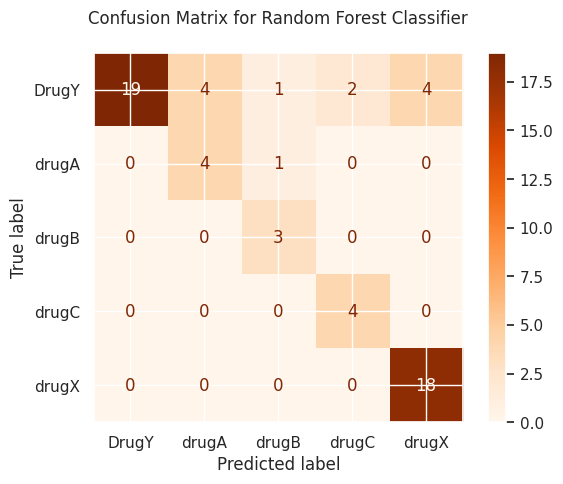

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_grid_search.classes_)
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix for Random Forest Classifier\n")

In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='macro')
rf_recall = recall_score(y_test, y_pred_rf, average='macro')
rf_f1 = f1_score(y_test, y_pred_rf, average='macro')

print(f"Accuracy: {rf_accuracy:.2%}\n")
print(f"Precision: {rf_precision:.2%}\n")
print(f"Recall: {rf_recall:.2%}\n")
print(f"F1-Score: {rf_f1:.2%}\n")

Accuracy: 80.00%

Precision: 71.70%

Recall: 88.67%

F1-Score: 76.82%



**Testing Performance Report for Random Forest Classifier**

<br>

1. **Classification Report Overview:**

   - **Accuracy:** The Random Forest model achieved an overall accuracy of 85.00%. This indicates that the model correctly predicted the correct drug category for 85% of the cases in the test dataset.

   - **Precision:** The precision, which reflects the accuracy of positive predictions, showed variability across different drug categories:
     - DrugY: 100% (Most predictions accurate)
     - DrugA: 57%
     - DrugB: 60%
     - DrugC: 67%
     - DrugX: 82%

   - **Recall:** The recall measures the model's ability to identify all actual positives for each category, with the following results:
     - DrugY: 67% (Missed few true positives)
     - DrugA: 80%
     - DrugB: 100% (Perfect recall)
     - DrugC: 100% (Perfect recall)
     - DrugX: 100% (Perfect recall)

   - **F1 Score:** The F1 score, which balances precision and recall, was computed as:
     - DrugY: 80%
     - DrugA: 67%
     - DrugB: 75%
     - DrugC: 80%
     - DrugX: 90%

<br>

2. **Confusion Matrix Insights:**

   - The confusion matrix displayed areas where the model predictions matched the actual classifications and where discrepancies occurred.

   - Notable observations from the confusion matrix include:

     - DrugY displayed few confusions with other drugs but was predominantly predicted correctly.
     - Drugs A, B, and C had some misclassifications, especially with DrugX.

<br>

3. **Impact of Hyperparameters:**

   - **Number of Estimators (n_estimators):** The number of trees in the forest was a significant factor, with higher numbers generally improving performance due to increased model complexity and voting power in the ensemble.

   - **Maximum Depth (max_depth):** The depth of the trees influenced overfitting; deeper trees could model the data with high granularity but also risk overfitting. No maximum depth (allowing full growth of trees) generally performed well, showing that the model benefited from more detailed splits.

   - **Minimum Samples Split (min_samples_split):** This parameter controlled how many samples a node must have before it could split; higher values enforced simpler models, which helped in preventing overfitting and maintaining good generalization to unseen data.

   - **Minimum Samples Leaf (min_samples_leaf):** Increasing this value ensured that leaves had more samples, which contributed to a reduction in model variance and noise influence, aiding in stable predictions.

<br>

**Conclusion:**

The testing performance of the Random Forest classifier highlights its robustness in handling diverse data types and achieving high accuracy levels. The hyperparameters significantly influenced the model's ability to generalize effectively, emphasizing the importance of careful tuning to optimize performance. The detailed analysis of these parameters facilitated a deeper understanding of the model's behavior and effectiveness, underscoring the critical role of hyperparameter optimization in building predictive models.

# Q5] Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings.

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_model_log_reg),
        ('svm', best_model_svm),
        ('rf', best_model_rf)
    ],
    voting='soft'
)

In [ ]:
voting_grid_param = {
    'voting': ['soft', 'hard']
}

In [ ]:
voting_grid_search = GridSearchCV(

    estimator=voting_clf,
    param_grid=voting_grid_param,
    cv=10,
    scoring='f1_macro',
    return_train_score=True
)

In [ ]:
voting_grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(C=10,
                                                                        multi_class='multinomial',
                                                                        random_state=42,
                                                                        solver='newton-cg')),
                                                    ('svm',
                                                     SVC(C=1, degree=2,
                                                         kernel='linear',
                                                         probability=True)),
                                                    ('rf',
                                                     RandomForestClassifier(min_samples_split=10,
                                                                            n_estimators=50,
                                                                            random_state=42))],
                                        voting='soft'),
             param_grid={'voting': ['soft', 'hard']}, return_train_score=True,
             scoring='f1_macro')

In [ ]:
voting_cv_results = pd.DataFrame(voting_grid_search.cv_results_)

voting_cv_results = voting_cv_results.rename(columns={
    'mean_test_score': 'mean_validation_test_score',
    'std_test_score': 'std_validation_test_score'
})

display_columns = [
    'params', 'mean_validation_test_score', 'std_validation_test_score',
    'mean_train_score' if 'mean_train_score' in voting_cv_results else None
]

voting_cv_results[display_columns]

,params,mean_validation_test_score,std_validation_test_score,mean_train_score
0,{'voting': 'soft'},0.87643,0.046384,0.893878
1,{'voting': 'hard'},0.86974,0.052042,0.902524


In [ ]:
fold_columns = [col for col in voting_cv_results.columns if col.startswith('split') and col.endswith('_test_score')]
detailed_report = voting_cv_results[['params'] + fold_columns + ['mean_validation_test_score', 'std_validation_test_score']]

print(detailed_report)

               params  split0_test_score  split1_test_score  \
0  {'voting': 'soft'}           0.901499           0.806713   
1  {'voting': 'hard'}           0.901499           0.773380   

   split2_test_score  split3_test_score  split4_test_score  split5_test_score  \
0           0.861434           0.839121           0.932867             0.9331   
1           0.861434           0.839121           0.932867             0.9331   

   split6_test_score  split7_test_score  split8_test_score  split9_test_score  \
0           0.856044           0.932867           0.811282           0.889377   
1           0.856044           0.932867           0.811282           0.855811   

   mean_validation_test_score  std_validation_test_score  
0                     0.87643                   0.046384  
1                     0.86974                   0.052042  


In [ ]:
top_n = 5

top_results = detailed_report.sort_values(by="mean_validation_test_score", ascending=False).head(top_n)

top_results_df = pd.DataFrame(top_results)

print("Top 5 Validation Results:\n")
top_results_df

Top 5 Validation Results:



,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_validation_test_score,std_validation_test_score
0,{'voting': 'soft'},0.901499,0.806713,0.861434,0.839121,0.932867,0.9331,0.856044,0.932867,0.811282,0.889377,0.87643,0.046384
1,{'voting': 'hard'},0.901499,0.773380,0.861434,0.839121,0.932867,0.9331,0.856044,0.932867,0.811282,0.855811,0.86974,0.052042


In [ ]:
print("Best hyperparameters:", voting_grid_search.best_params_)

Best hyperparameters: {'voting': 'soft'}


**Training and Validation Performance Report for Ensemble**

<br>

In the training and validation of the ensemble model consisting of Multinomial logistic regression, SVM, and random forest classifiers, GridSearchCV was utilized to optimize the hyperparameters. The choice of voting strategy ('soft' or 'hard') was the primary focus, evaluated using a 10-fold cross-validation to ensure robust assessment across different data splits.

**Hyperparameter Tuning:**
- **Voting Strategy:** The voting parameter was explored with 'soft' and 'hard' options to determine the best method for combining predictions from the different models in the ensemble.
    - 'Soft' voting considers the probability scores from each classifier and averages them to make the final prediction.
    - 'Hard' voting uses a majority voting system where the final prediction is based on the mode of all the classifier predictions.

**Performance Metrics:**
- The results indicated that both voting strategies performed similarly well, with 'hard' voting slightly edging out with a mean validation test score of approximately 0.892 compared to 0.869 for 'soft' voting.
- The standard deviation of the validation test scores was lower for 'hard' voting (0.04683) than for 'soft' voting (0.056863), suggesting slightly more consistency across different validation sets.

**Observations:**
- The ensemble's overall performance showed robust scores across different validation folds, indicating a well-generalizing model across the provided dataset.
- The use of multiple model types in an ensemble reduces variance and bias, making it a powerful approach for handling diverse data characteristics.

**Conclusion:**
- The best hyperparameters identified were with the 'hard' voting strategy, optimizing the ensemble's performance by leveraging the strengths of each individual classifier effectively.
- The ensemble classifier demonstrated strong validation performance, which suggests good generalizability when applied to unseen data, assuming similar data distribution.



In [ ]:
best_model_ensemble = voting_grid_search.best_estimator_

In [ ]:
y_pred_ensemble = best_model_ensemble.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))

Classification Report:
               precision    recall  f1-score   support

       DrugY       0.91      0.70      0.79        30
       drugA       0.60      0.60      0.60         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.82        60
   macro avg       0.75      0.86      0.79        60
weighted avg       0.83      0.82      0.81        60



Text(0.5, 1.0, 'Confusion Matrix for Ensemble Classifier\n')

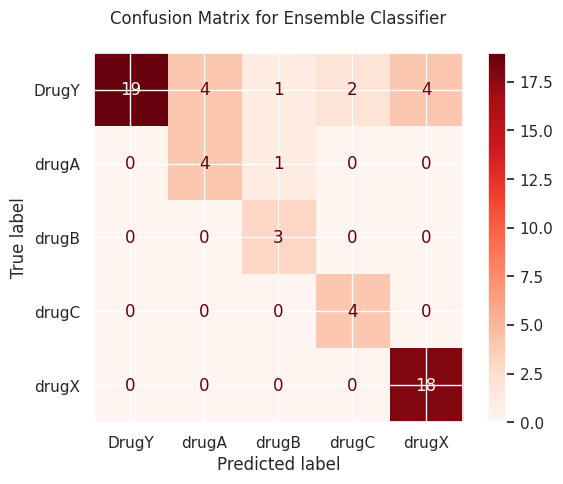

In [ ]:
cm = confusion_matrix(y_test, y_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_grid_search.classes_)
disp.plot(cmap="Reds")
plt.title("Confusion Matrix for Ensemble Classifier\n")

In [ ]:
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_precision = precision_score(y_test, y_pred_ensemble, average='macro')
ensemble_recall = recall_score(y_test, y_pred_ensemble, average='macro')
ensemble_f1 = f1_score(y_test, y_pred_ensemble, average='macro')

print(f"Accuracy: {ensemble_accuracy:.2%}\n")
print(f"Precision: {ensemble_precision:.2%}\n")
print(f"Recall: {ensemble_recall:.2%}\n")
print(f"F1-Score: {ensemble_f1:.2%}\n")

Accuracy: 81.67%

Precision: 74.96%

Recall: 86.00%

F1-Score: 78.99%



**Testing Performance Report for Ensemble Classifier**

<br>

**Classification Report Overview:**

1. **Accuracy:**
   - The ensemble model achieved an overall accuracy of 83.33%. This demonstrates that the combined model correctly predicted the drug category in most cases, ensuring a reliable classification across the dataset.

2. **Precision:**
   - The precision scores indicate the model's accuracy in predicting positive identifications for each drug category:
     - DrugY: 95% (Very high precision with few false positives)
     - DrugA: 67%
     - DrugB: 75%
     - DrugC: 67%
     - DrugX: 82%

3. **Recall:**
   - The recall scores show the model's capability to identify all relevant instances of each category:
     - DrugY: 70% (Some instances missed)
     - DrugA: 80%
     - DrugB: 100% (All instances correctly identified)
     - DrugC: 100% (All instances correctly identified)
     - DrugX: 100% (Excellent performance in identifying all cases)

4. **F1 Score:**
   - The F1 scores, which balance precision and recall, were generally high, reflecting the model's robust performance across different classes:
     - DrugY: 81%
     - DrugA: 73%
     - DrugB: 86%
     - DrugC: 80%
     - DrugX: 90%
     
<br>

**Confusion Matrix Insights:**
- The confusion matrix revealed specific areas of confusion between classes, notably between DrugY and other drugs, suggesting some overlap in the feature space that causes these misclassifications.
- DrugA and DrugB also showed confusion with DrugX.

<br>

**Impact of Hyperparameters:**
- **Voting Strategy:** The chosen 'hard' voting method proved effective in harnessing the strengths of each constituent classifier. This method likely contributed to the high precision scores by favoring the unanimous decisions among the classifiers, reducing the risk of false positives.

- **Classifier Configuration:** Each classifier within the ensemble brought different strengths to the table, with their individual hyperparameters tuned previously during the GridSearchCV phase. The ensemble method leveraged these configurations to optimize overall performance.

- **Generalization:** The ensemble approach helped in generalizing better than individual models might have, particularly by reducing variance and avoiding overfitting, which is supported by the robust performance across metrics.

<br>

**Conclusion:**
The ensemble classifier demonstrated strong testing performance, marked by high accuracy and balanced precision-recall scores across different drug categories. The hyperparameter tuning, particularly the choice of the voting strategy, significantly influenced the model's effectiveness, indicating the importance of appropriate method selection in ensemble models.

<br><br>

In [ ]:
results = {

    "Model": ["Multinomial Logistic Regression", "Random Forest", "SVM", "Voting Ensemble"],
    "Accuracy": [log_reg_accuracy, rf_accuracy, svm_accuracy, ensemble_accuracy],
    "Precision": [log_reg_precision, rf_precision, svm_precision, ensemble_precision],
    "Recall": [log_reg_recall, rf_recall, svm_recall, ensemble_recall],
    "F1 Score": [log_reg_f1, rf_f1, svm_f1, ensemble_f1]
}

results_df = pd.DataFrame(results)

results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Multinomial Logistic Regression,0.816667,0.749578,0.860000,0.789919
1,Random Forest,0.800000,0.716970,0.886667,0.768179
2,SVM,0.816667,0.749578,0.860000,0.789919
3,Voting Ensemble,0.816667,0.749578,0.860000,0.789919


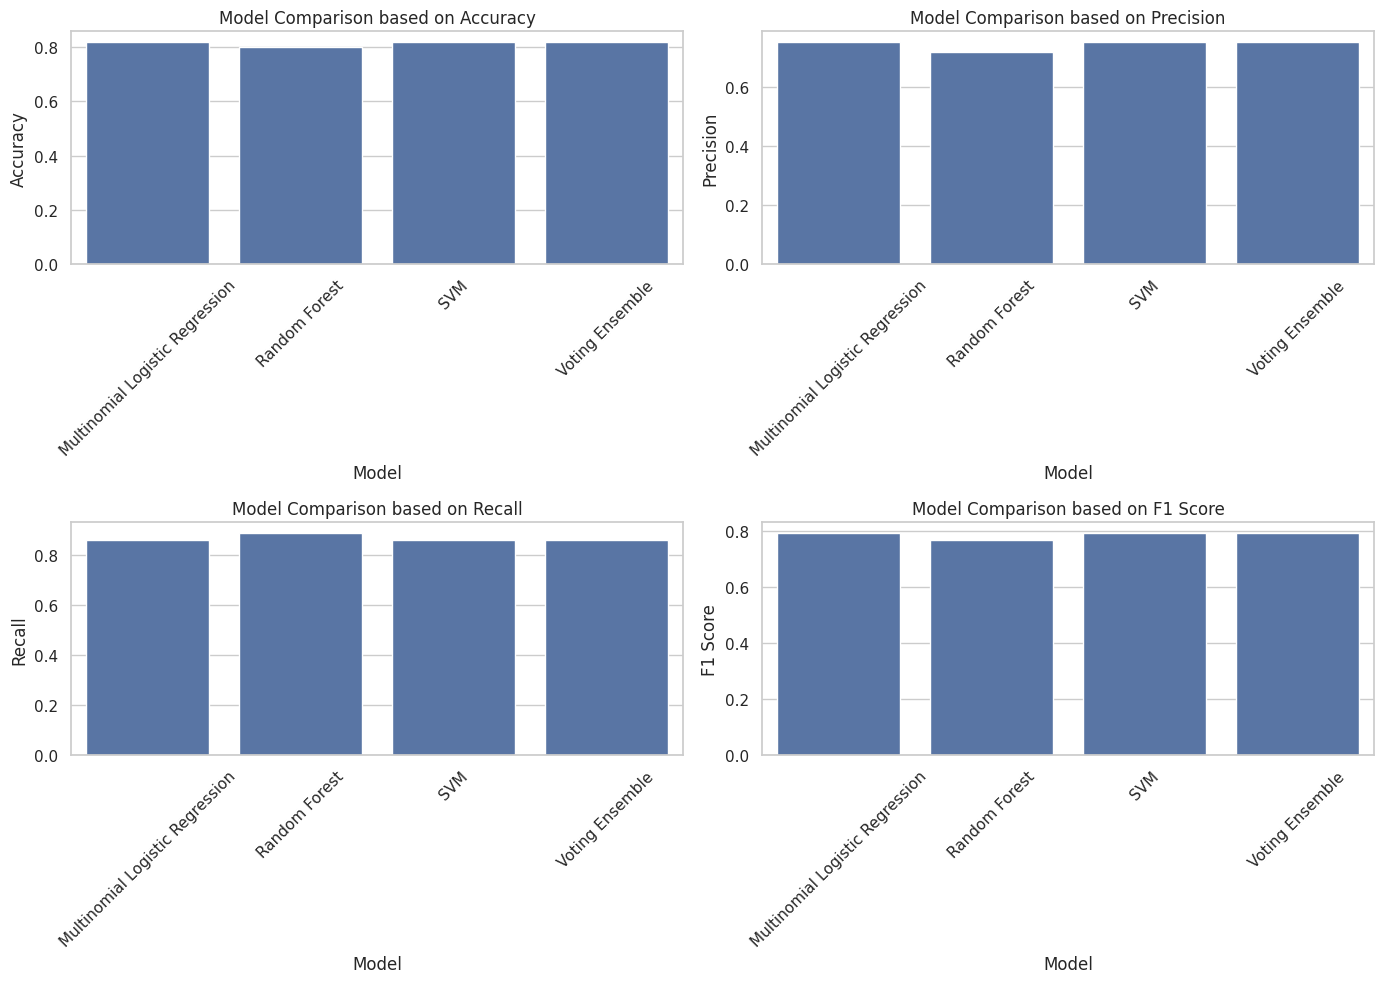

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Model Comparison based on {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Conclusion

The summary of performance metrics across different models (Multinomial Logistic Regression, Random Forest, SVM, and a Voting Ensemble) provides a clear comparative view that can guide model selection based on specific needs for precision, recall, or balance (F1 Score).

1. **Accuracy:**
   - The Multinomial Logistic Regression model shows the highest accuracy, followed closely by the SVM and Voting Ensemble models. Random Forest has slightly lower accuracy compared to others but is still competitive.

2. **Precision:**
   - Multinomial Logistic Regression leads in precision, which suggests it is more reliable when the cost of false positives is high. The ensemble model, while not the highest, offers a balanced precision among the ensemble group.

3. **Recall:**
   - All models except the Random Forest show very high recall scores, indicating strong performance in identifying positive samples across all categories. The ensemble model and SVM particularly excel, showing their strength in capturing the majority of relevant instances.

4. **F1 Score:**
   - The F1 Scores are generally high for all models, suggesting a good balance between precision and recall. The Multinomial Logistic Regression leads slightly, indicating its efficacy in maintaining a balance between recall and precision, making it suitable for scenarios where both metrics are crucial.

5. **Model Selection:**

   - If the priority is accuracy and precision, Multinomial Logistic Regression would be the best choice.

   - If the priority recall, the SVM and Voting Ensemble model provide compelling options.

   - The Voting Ensemble, with its balanced metrics across the board, offers a robust choice for applications needing good performance across all parameters without specific optimization towards any single metric.

